<a href="https://colab.research.google.com/github/LukasPurbaW/learn-bahasa-indonesia/blob/main/Video_Legal_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dictionary Legal Words
This Code is used to scrap Indonesian words that are used by Indonesia Holomembers Streamer through their Youtube video's subtitle, verify the words using KBBI, and then translate it using google translate lib

In [6]:
!pip -qq install youtube-transcript-api
!pip -qq install pillow

In [10]:
## Video ID
#url = https://youtu.be/lL7SAjOaijw

video_id = 'lL7SAjOaijw'
thumbnail_url = "http://img.youtube.com/vi/%s/0.jpg" % video_id

#to do list 
# 1. Regex to get id from video_url
# 2. Find a way to iterate multiple video_id

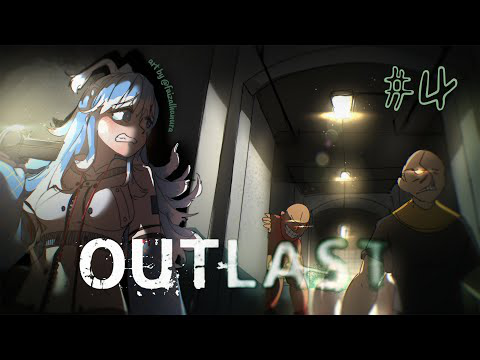

In [11]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve(thumbnail_url, 'Kobo')
img = Image.open('Kobo')
img

## Extract CC from Videos

In [12]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import JSONFormatter

formatter = JSONFormatter()
subtitle = YouTubeTranscriptApi.get_transcript(video_id,
                                          languages=['id'])

json_formatted = formatter.format_transcript(subtitle)

with open(video_id +'.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_formatted)

In [13]:
import pandas as pd
import json

# Use pandas.DataFrame.from_dict() to Convert JSON to DataFrame
df = pd.read_json(video_id +'.json')
df.sample(10)

,text,start,duration
214,sumpil eh aduh maju dikit ini nih maju,850.630,5.850
197,ngapain ya,788.990,5.360
1086,Kita resmi menamatkan OVA 1 ya guys,3782.339,5.101
548,situ,1962.910,4.200
256,yang pulang tadi ya,996.320,4.079
79,ya bisa dong,374.680,2.540
732,hai hai,2647.310,3.450
482,Hai mainin yang cat gini-gini pasti ada,1733.270,5.060
545,matematika,1953.370,7.680
942,oke oke Guys obyek yang juga is a,3292.170,7.080


## Counting Words Frequencies

In [78]:
df_text = df['text']
Combined_words = df_text.str.cat(sep=' ')
Combined_words = Combined_words.lower()
Combined_words = Combined_words.split(" ")


New_dict_frequencies = {i:Combined_words.count(i) for i in Combined_words}
New_dict_frequencies

New_dict = pd.DataFrame.from_dict(New_dict_frequencies, orient='index',columns=['Frequency'])
New_dict = New_dict.sort_values(by=['Frequency'],ascending=False)
New_dict.head(10)

,Frequency
hai,594
ya,212
ini,138
aku,119
guys,105
yang,91
udah,84
aduh,78
di,77
itu,76


## Searching the meaning of the words using KBBI as verifier
(only legal Indonesian language (no slank))

In [43]:
!pip -qq install kbbi

In [65]:
from kbbi import KBBI
#cinta = KBBI('cinta')

!pip -qq install tqdm
from tqdm import tqdm

In [75]:
kbbi_url="https://raw.githubusercontent.com/bukujari/kbbi/master/assets/daftar-kata.json"
KBBI = pd.read_json(kbbi_url)
KBBI.sample(20)

# To do list
#Save the daftar-kata.json

,uri,keyword
12968,kedangkan,Kedangkan
10700,infrastruktur,Infrastruktur
15956,lanar,Lanar
22515,plutokrasi,Plutokrasi
10445,ikram,Ikram
17027,lohok,Lohok
30879,/wilayah,Wilayah
30784,/waswas,Waswas
21195,pascalahir,Pascalahir
1376,anterior,Anterior


In [94]:
merged = pd.merge(New_dict, KBBI, left_index=True, right_on='uri')
del merged["keyword"]
merged = merged.set_index('uri')
merged.index.name = None
Legal_Words = merged
Legal_Words

,Frequency
hai,594
ini,138
aku,119
aduh,78
di,77
...,...
cuci,1
hebat,1
lucah,1
obyek,1


### Legal Words Translation

In [96]:
!pip -qq install googletrans==4.0.0rc1
#testing
from googletrans import Translator
translator = Translator()
ar = translator.translate('Saya',src="id",dest="en").text
print(ar)

I


In [100]:
Vocab = Legal_Words.index[0]
ar = translator.translate(str(Vocab),src="id",dest="en").text
ar

'Hi'

In [107]:
import numpy as np
NaN = np.nan
df = Legal_Words
df["Meaning"] = NaN
for i in range(len(df)) :
  if pd.isnull(df.iloc[i, df.columns.get_loc('Meaning')]) == True :
    try : 
      Vocab = Legal_Words.index[i]
      print("===================")
      print("Number of data :",i, "out of",len(df))
      
      print(Vocab)
      ar = translator.translate(str(Vocab),src="id",dest="en").text
      print("the translation is :", ar)
      df.iloc[i, df.columns.get_loc('Meaning')] = ar
      
    except Exception:
      pass



Number of data : 0 out of 755
hai
the translation is : Hi
Number of data : 1 out of 755
ini
Number of data : 2 out of 755
aku
the translation is : I
Number of data : 3 out of 755
aduh
the translation is : ouch
Number of data : 4 out of 755
di
the translation is : in
Number of data : 5 out of 755
itu
the translation is : that
Number of data : 6 out of 755
ada
the translation is : there is
Number of data : 7 out of 755
sih
Number of data : 8 out of 755
kita
the translation is : we
Number of data : 9 out of 755
oke
the translation is : okay
Number of data : 10 out of 755
apa
the translation is : what
Number of data : 11 out of 755
enggak
the translation is : no
Number of data : 12 out of 755
ah
the translation is : Ah
Number of data : 13 out of 755
kalian
the translation is : We
Number of data : 14 out of 755
mami
the translation is : Mommy
Number of data : 15 out of 755
lagi
the translation is : again
Number of data : 16 out of 755
mau
the translation is : want to
Number of data : 17 out

In [111]:
df.to_csv("Translated all legal words "+ video_id)